In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from itertools import product
from statsmodels.graphics.api import qqplot
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['Heiti TC']# 显示中文字体

In [2]:
# 导入数据
data=pd.read_csv('data.csv',sep=",",encoding='gb2312')
# 将格式转为时间
data['Time']=pd.to_datetime(data['Time'],dayfirst=True, errors='coerce')

In [3]:
data.index=data.Time
data.dropna()
data.head()

,Time,同美国进口总额(千美元),同美国出口总额(千美元)
Time,,,
2000-01-01,2000-01-01,1596346.0,3418449.0
2000-02-01,2000-02-01,1304670.0,3055219.0
2000-03-01,2000-03-01,1760067.0,3986851.0
2000-04-01,2000-04-01,1986613.0,4161844.0
2000-05-01,2000-05-01,1707932.0,4300857.0


In [17]:
test=data['2000/01/01':'2018/05/01']#测试数据集

In [18]:
ps = range(0, 3)
qs = range(0, 3)
parameters = product(ps, qs)
parameters_list = list(parameters)
# 寻找最优ARMA模型参数，即best_aic最小
results = []
best_aic = float("inf") # 正无穷
for param in parameters_list:
    try:
        model = ARMA(test['同美国进口总额(千美元)'],order=(param[0], param[1])).fit()
    except ValueError:
        print('参数错误:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
# 输出最优模型
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print('最优模型: ', best_model.summary())

参数错误: (0, 2)
参数错误: (1, 1)
参数错误: (1, 2)
参数错误: (2, 0)
参数错误: (2, 1)
参数错误: (2, 2)
最优模型:                                ARMA Model Results                              
Dep. Variable:           同美国进口总额(千美元)   No. Observations:                    3
Model:                     ARMA(1, 0)   Log Likelihood                 -42.749
Method:                       css-mle   S.D. of innovations         292628.815
Date:                Sat, 28 Mar 2020   AIC                             91.499
Time:                        23:05:56   BIC                             88.795
Sample:                    03-01-2018   HQIC                            86.063
                         - 05-01-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.446e+07   1.12e+05    129.356      0.005    1.42e+07    1.47e+07
ar.L1.同美国进口总额(千美元)    

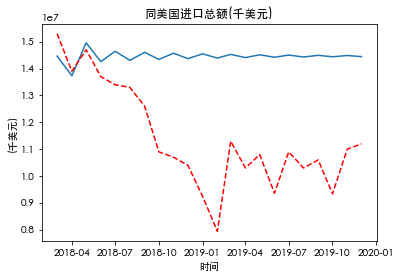

<Figure size 1440x1440 with 0 Axes>

In [19]:
data['forecast_进口'] = best_model.predict(start=0, end=(241))
data=data['2018/03/01':]
plt.title('同美国进口总额(千美元)')
plt.xlabel('时间')
plt.ylabel('(千美元)')
plt.plot(data.Time,data['forecast_进口'],label='预测值')
plt.plot(data.Time,data['同美国进口总额(千美元)'],color='r', ls='--',label='实际值')
plt.figure(figsize=(20,20))
plt.show()

In [20]:
ps = range(0, 3)
qs = range(0, 3)
parameters = product(ps, qs)
parameters_list = list(parameters)
# 寻找最优ARMA模型参数，即best_aic最小
results = []
best_aic = float("inf") # 正无穷
for param in parameters_list:
    try:
        model = ARMA(test['  同美国出口总额(千美元)'],order=(param[0], param[1])).fit()
    except ValueError:
        print('参数错误:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
# 输出最优模型
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print('最优模型: ', best_model.summary())

参数错误: (0, 2)
参数错误: (1, 1)
参数错误: (1, 2)
参数错误: (2, 0)
参数错误: (2, 1)
参数错误: (2, 2)
最优模型:                                ARMA Model Results                              
Dep. Variable:           同美国出口总额(千美元)   No. Observations:                    3
Model:                     ARMA(0, 0)   Log Likelihood                 -49.503
Method:                           css   S.D. of innovations        3549021.774
Date:                Sat, 28 Mar 2020   AIC                            103.007
Time:                        23:05:58   BIC                            101.204
Sample:                    03-01-2018   HQIC                            99.383
                         - 05-01-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.537e+07   2.05e+06     17.260      0.003    3.14e+07    3.94e+07


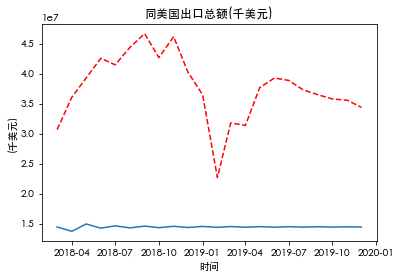

<Figure size 1440x1440 with 0 Axes>

In [21]:
data['forecast_出口'] = best_model.predict(start=0, end=(241))
data=data['2018/03/01':]
plt.title('同美国出口总额(千美元)')
plt.xlabel('时间')
plt.ylabel('(千美元)')
plt.plot(data.Time,data['forecast_进口'],label='预测值')
plt.plot(data.Time,data['  同美国出口总额(千美元)'],color='r', ls='--',label='实际值')
plt.figure(figsize=(20,20))
plt.show()

In [9]:
data.to_excel('n_data.xls',index=False)